In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
# analyzing how much degree you want
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [12]:
# do the work (create the column etc...)
poly_feature = polynomial_converter.transform(X)

In [13]:
poly_feature.shape

(200, 9)

In [9]:
X.shape

(200, 3)

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
230.1*37.8

8697.779999999999

In [17]:
230.1*69.2

15922.92

In [18]:
37.8*69.2

2615.7599999999998

In [20]:
230.1**2 # 37.8**2 and 69.2**2

52946.009999999995

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_preds = model.predict(X_test)

In [27]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test, test_preds)

In [30]:
MSE = mean_squared_error(y_test, test_preds)

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test, test_preds))

In [32]:
MAE

0.489679804480384

In [33]:
RMSE

0.6646431757269265

 MAE: 1.213 RMSE: 1.516

# Bias Variance Trade-Off

In [34]:
# Create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the result (error vs poly order)

In [37]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_feature = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)
    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [38]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292228,
 0.4339344356902063,
 0.35170836883993517,
 0.2509342985395027,
 0.19690615851144136,
 5.422037139111659,
 0.14316732687979142,
 0.1722581954841464]

In [39]:
test_rmse_errors

[1.516151937599388,
 0.6646431757269265,
 0.5803286825229391,
 0.5077742636933155,
 2.575824020690919,
 4.272899302552715,
 1378.6166854154399,
 4335.079846618992,
 99214.6554497592]

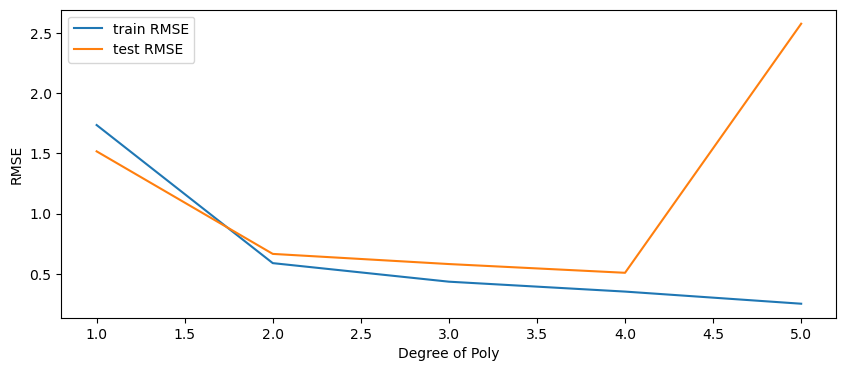

In [45]:
plt.figure(figsize=(10,4))

plt.plot(range(1,6), train_rmse_errors[:5],label='train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5],label='test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend();

# Model Deployment

In [46]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [47]:
final_model = LinearRegression()

In [48]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [49]:
from joblib import dump, load

In [51]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [52]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [53]:
load_converter = load('final_converter.joblib')

In [54]:
loaded_model = load('final_poly_model.joblib')

In [55]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [57]:
transform_data = load_converter.fit_transform(campaign)

In [58]:
loaded_model.predict(transform_data)

array([14.64501014])